In [1]:
import os
import glob
import re
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
scenes = ["scene0000_01", "scene0079_00", "scene0158_00", "scene0316_00", "scene0521_00", "scene0553_00", "scene0616_00"]


In [3]:
filepaths = glob.glob("./logs/*/nerf/results/depth_evaluation.txt")
# filepaths = filter(os.path.isfile, filepaths)

columns = ['exp_name', 'scene', 'factor', 'netdepth', 'netwidth', 'abs_rel', 'sq_rel', 'rmse', 'rmse_log', 'a1', 'a2', 'a3']
df = pd.DataFrame(columns=columns)
df = df.set_index('exp_name')

exp_name_regex = r"logs\/(.*)\/nerf\/results\/depth_evaluation\.txt"
settings_regex = r"f(\d*)d(\d*)w(\d*)"

for filepath in filepaths:
    exp_name = re.search(exp_name_regex, filepath).group(1).split('_')
    scene = "_".join(exp_name[:-1])
    exp_name = "_".join(exp_name)
    if scene:
        with open(filepath, 'r') as file:
            # get second line
            data = file.read().split('\n')[1]
            # print(data)
            # discard double slash
            data = data.split('\\')[0]
            # discard double slash
            data = data.split('& ')
            # remove whitespace and convert to float
            data = map(lambda s: float(s.strip()), data[1:])
            # convert yo dictionary with column names as keys
            data = dict(zip(columns[-7:], data))
            
            # add setting data
            settings = re.search(settings_regex, exp_name)
            factor, netdepth, netwidth = settings.groups(1)
            data['scene'] = scene
            data['factor'], data['netdepth'], data['netwidth'] = int(factor), int(netdepth), int(netwidth)
            
            df.loc[exp_name] = data
            # df.concat(data, ignore_index=True)
df

,scene,factor,netdepth,netwidth,abs_rel,sq_rel,rmse,rmse_log,a1,a2,a3
exp_name,,,,,,,,,,,
scene0158_00_f8d08w0512,scene0158_00,8,8,512,0.0998,0.0208,0.1629,0.1445,0.9099,0.9869,0.9940
scene0158_00_f8d08w0384,scene0158_00,8,8,384,0.0995,0.0207,0.1625,0.1440,0.9108,0.9867,0.9940
scene0000_01_f8d08w0128,scene0000_01,8,8,128,0.0400,0.0074,0.1266,0.0532,0.9877,0.9993,0.9999
scene0616_00_f8d08w0320,scene0616_00,8,8,320,0.0652,0.0181,0.1689,0.0996,0.9535,0.9870,0.9964
scene0000_01_f8d08w0064,scene0000_01,8,8,64,0.0417,0.0080,0.1327,0.0555,0.9872,0.9993,0.9999
...,...,...,...,...,...,...,...,...,...,...,...
scene0521_00_f8d08w0512,scene0521_00,8,8,512,0.0549,0.0075,0.0890,0.0809,0.9704,0.9971,1.0000
scene0079_00_f8d08w0128,scene0079_00,8,8,128,0.0381,0.0058,0.1087,0.0574,0.9916,0.9995,1.0000
scene0616_00_f8d10w0256,scene0616_00,8,10,256,0.0628,0.0168,0.1668,0.0968,0.9558,0.9899,0.9968


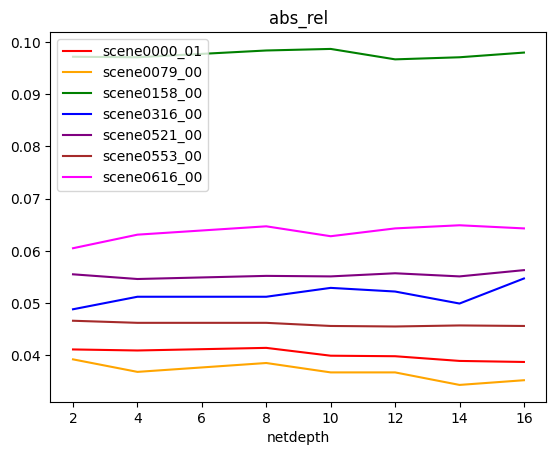

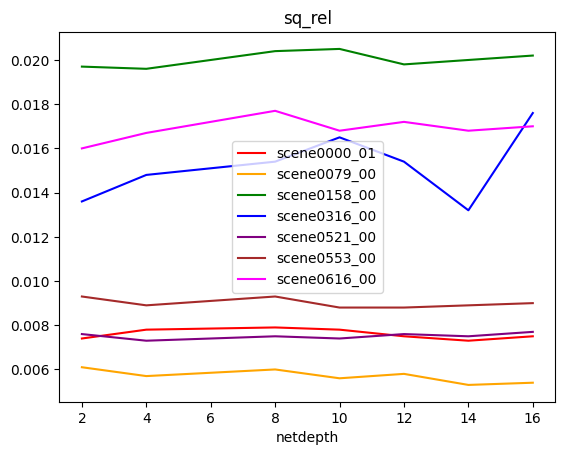

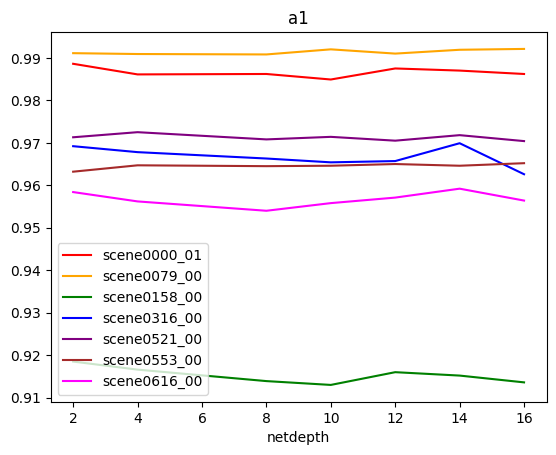

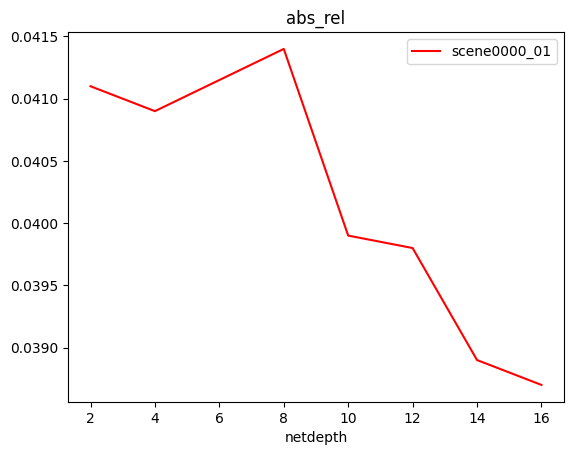

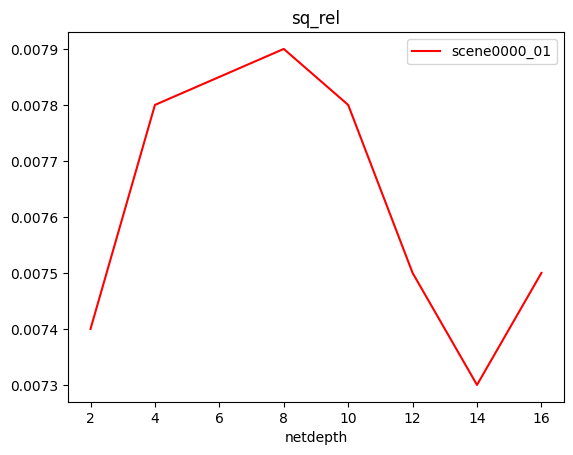

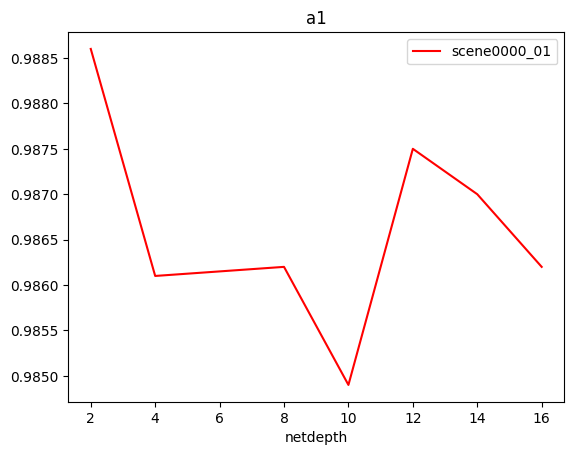

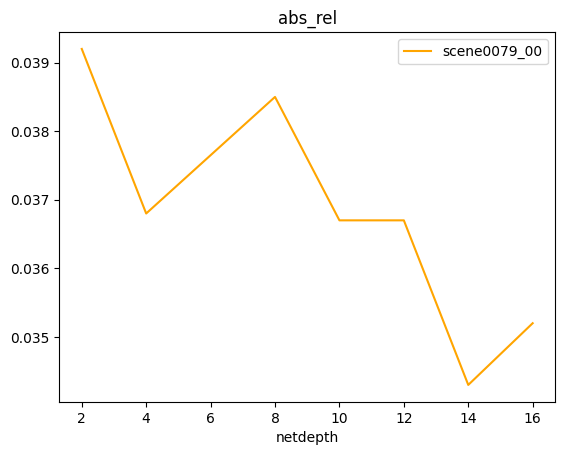

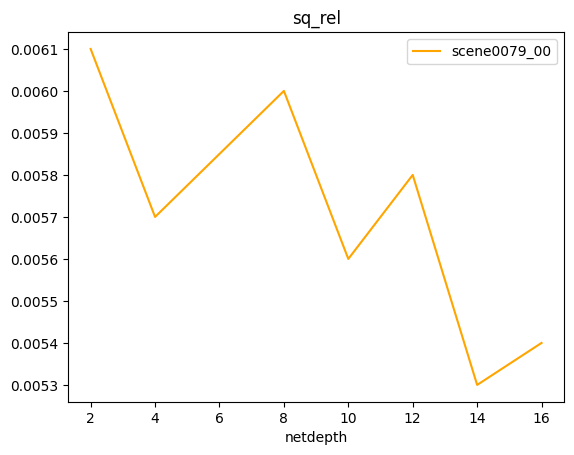

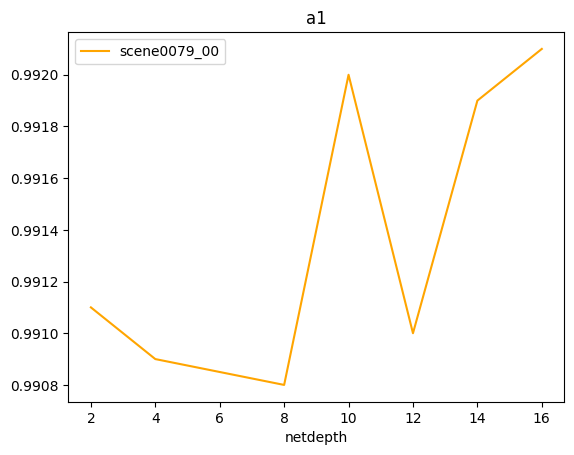

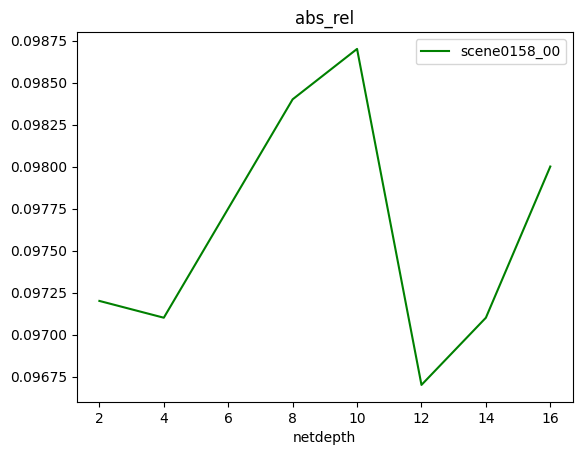

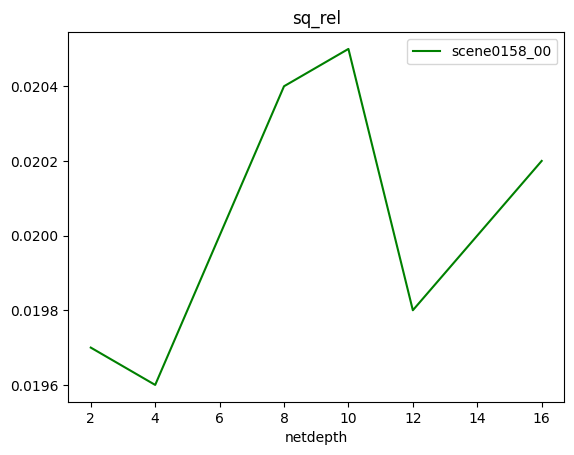

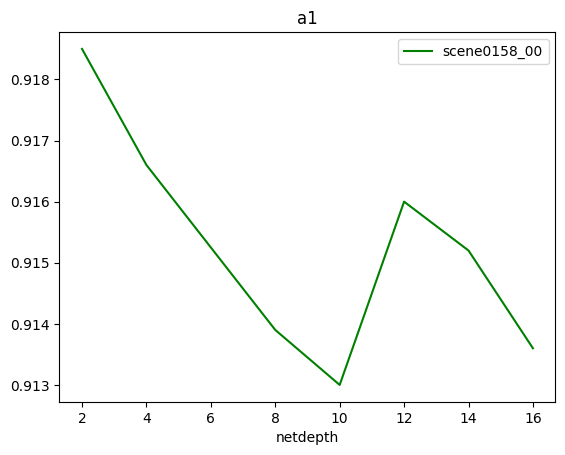

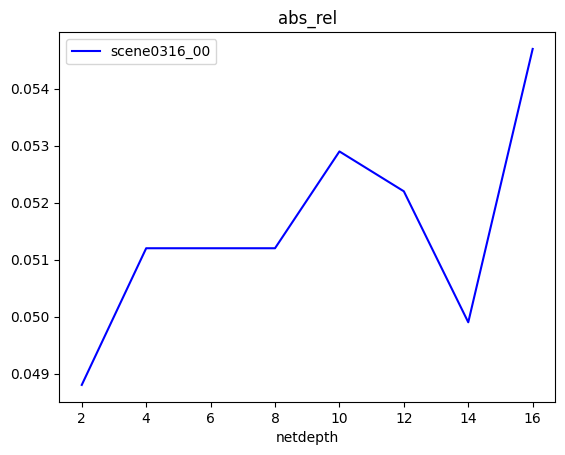

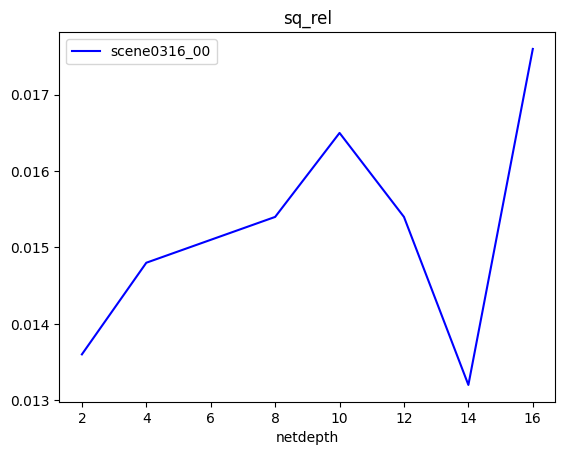

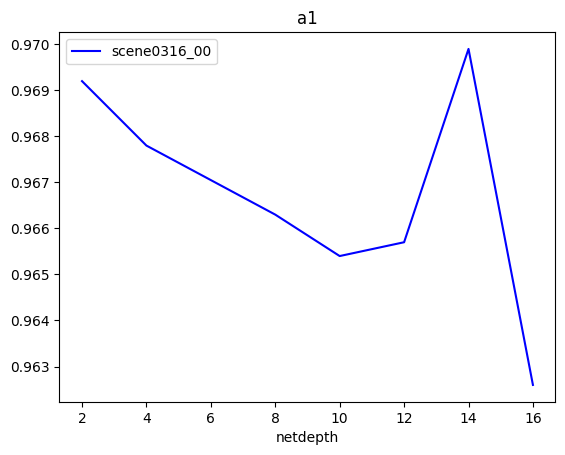

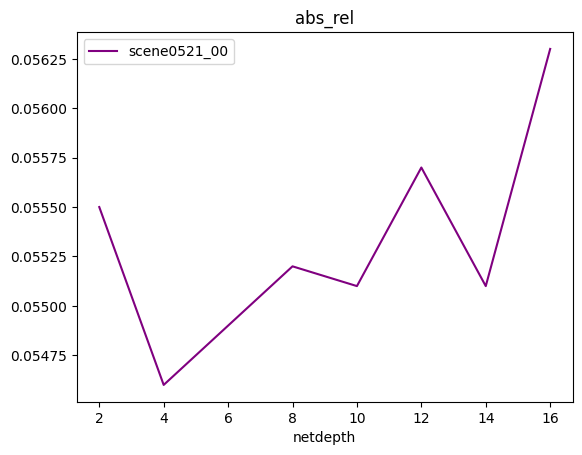

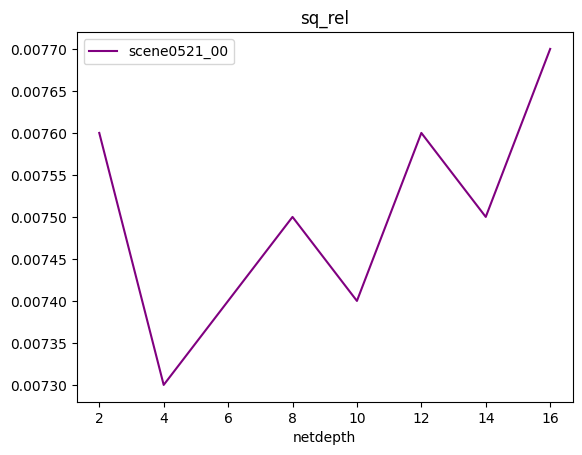

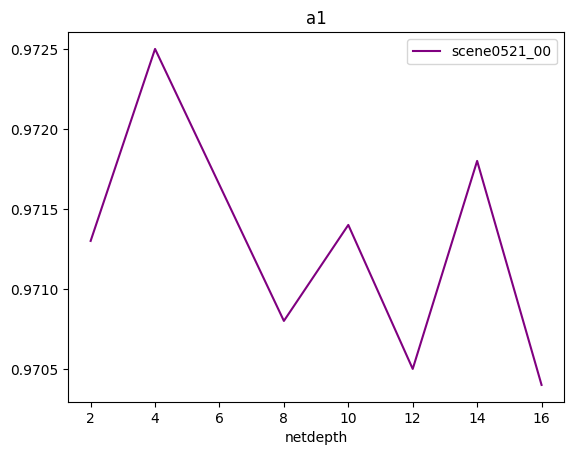

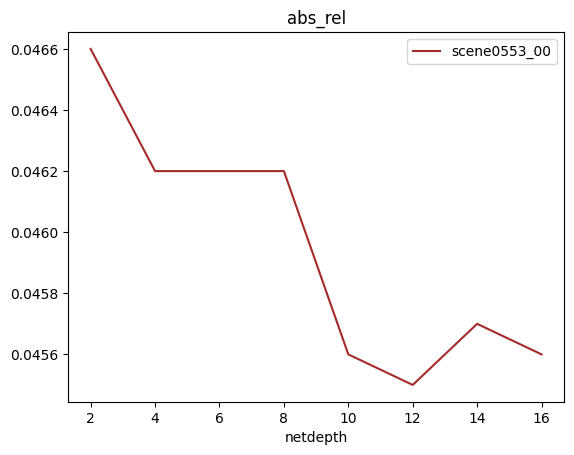

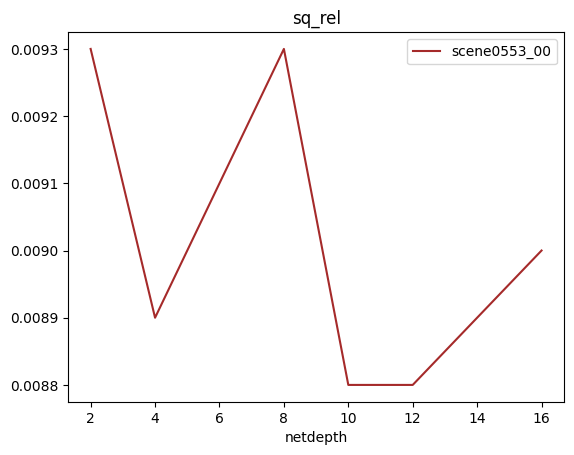

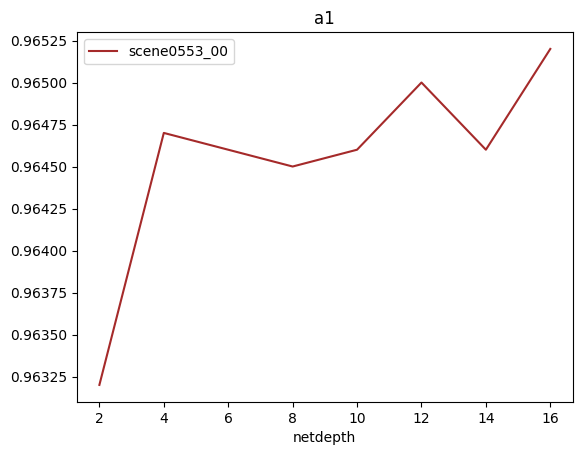

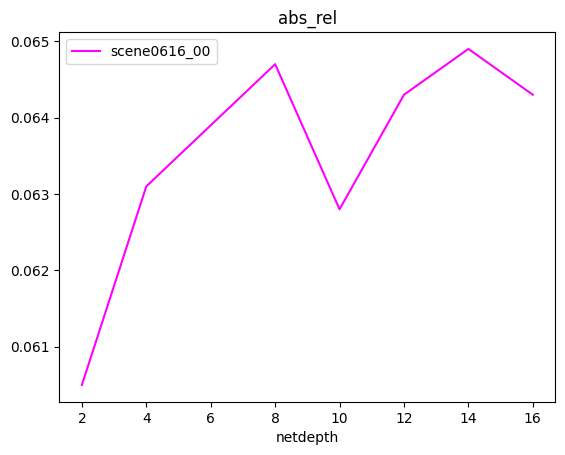

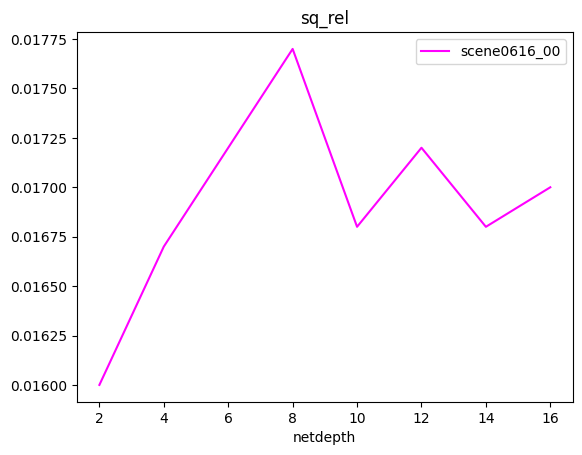

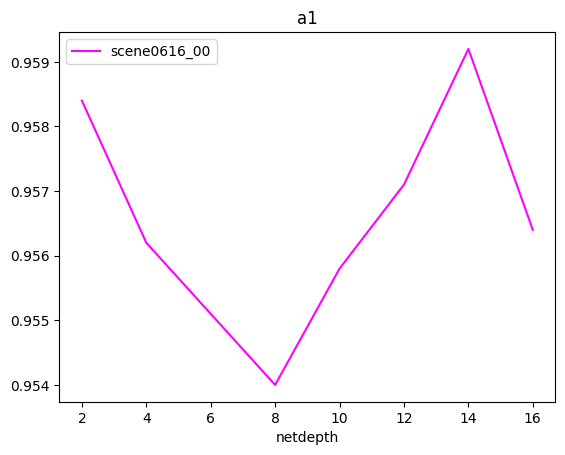

In [39]:
ax = None
colors = ['red', 'orange', 'green', 'blue','purple','brown', 'magenta', 'pink']
yaxes = ['abs_rel', 'sq_rel', 'a1']
axs = [None] * len(yaxes)
for scene, color in zip(scenes, colors):
    depth_query = df.query('scene == "{}" & netwidth == 256'.format(scene)).sort_values('netdepth')
    for i, yaxis in enumerate(yaxes):
        axs[i] = depth_query.plot(ax=axs[i], kind='line',x='netdepth',y=yaxis, title=yaxis, label=scene, color=color)

for scene, color in zip(scenes, colors):
    depth_query = df.query('scene == "{}" & netwidth == 256'.format(scene)).sort_values('netdepth')
    for i, yaxis in enumerate(yaxes):
        depth_query.plot(kind='line',x='netdepth',y=yaxis, title=yaxis, label=scene, color=color)
# display(depth_query)
# depth_query.plot(kind='line',x='netdepth',y='abs_rel',color='red')
# depth_query.plot(kind='line',x='netdepth',y='sq_rel',color='red')
# depth_query.plot(kind='line',x='netdepth',y='rmse',color='red')
# depth_query.plot(kind='line',x='netdepth',y='rmse_log',color='red')
# depth_query.plot(kind='line',x='netdepth',y='a1',color='red')